# Project 1: SAT & ACT Analysis



## Problem Statement

SAT participation rates vary from that of ACT participation rates. As a member of the College Board, my goal is to take a look at SAT and ACT data from 2017 and 2018 in order to find ways that can increase participation for the SAT in a financially responsible manner.



## Executive Summary

For this project, I examined SAT and ACT participation rates by state for 2017 and 2018 looking for trends in the data. I used several data sets which included statewide average scores for each section and composite/total scores for both exams. These data sources provided the framework for my data analysis.

After cleaning the data and making sure all data types for each category were correct, I was able to start examining the data in closer detail. I first took a look at SAT vs ACT participation rates in the form of a histogram to see the distribution of both exams. It became clear when seeing the graphs, that the SAT had many more states with lower participation rates than the ACT, while the ACT had many with 100% participation. The ACT is mandatory to take in several states.

Another area I examined was participation rates by region to see if there were any trends. The largest disparity between the two tests was in the south. The south had the lowest SAT participation rate, but had the highest ACT participation. The ACT is mandatory in many southern states. The result of this is that only the most college-driven students will also take the SAT. The students who don't care about college will only take the mandatory exam which causes the gap between the participation rates. 

It's important to note, that these tests are not the same. ACT tests different skills and subjects than the SAT. For example, the ACT tests science while the SAT does not. This is an important item to keep in mind when thinking about ways to increase the participation rate for the SAT and is what my analysis was motivated by.



### Contents:
- [Imports](#Imports)
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Imports

In [113]:
#Imports:
import numas np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
%matplotlib inline

## 2017 Data Import and Cleaning

#### Reading In SAT & ACT  Data

Reading in the `sat_2017.csv` and `act_2017.csv` files and assigning them to pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### Displaying Data

Printing the first 10 rows of each dataframe.

In [3]:
#Code:
sat_2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


Can quickly see that the ACT data contains a line item for National scores while the SAT data does not.

#### Describing Data



The data sets describe the participation rates and average scores by State in 2017 for taking the SAT and ACT. Both data sets also provide average scores for each section by state. 

In [5]:
#Describing SAT data
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Can see that there is a minimum math score of 52. This can't be correct as the minimum score for a section is 200 on the SAT. I will need to look into this further.

In [6]:
#Sorting by Math
sat_2017.sort_values('Math').head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


Maryland has an average math score of 52. This is incorrect.

In [7]:
#Describing ACT data
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


One state has an average science score of 2.3. I will need to look into this further. 

In [8]:
act_2017.sort_values('Science').head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


Maryland has its average science score listed as 2.3. This value is incorrect.

In [9]:
#Looking at data types
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Data looks complete with no missing values. Will need to update the data type for `Participation` to be an integer.

In [10]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


This data also looks complete with no missing values. Will need to update the data type for `Participation` to be an integer and look into why the `Composite` column has an object data type.

In [11]:
#Looking for string in composite column
act_2017[act_2017['Composite'].str.contains('x')]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### More Observations
 
 - Composite score for ACT is listed as data type object(string) when it should be a float. Wyoming has an 'x' in it.
 - Participation rates for both SAT and ACT should be listed as floats and not objects.
 - SAT does not include a row for National
 - The min score for Math on the SAT is listed as 52. This was inputted incorrectly.
 - The min score for Science on the ACT is listed as 2.3. This was inputted incorrectly.
 - ACT scores can range from 1-36 for composite and each subset
 - SAT scores can range from 400-1600 for the `Total` and 200-800 for both sections.
 - ACT Min/Max Scores from Data Set:
  - English: 16.3, 25.5
  - Math: 18.0, 25.3
  - Reading: 18.1, 26.0
  - Science: 2.3, 24.9
 - SAT Min/Max Scores from Data Set:
  - Evidenced Based Reading and Writing: 482, 644
  - Math: 52, 651
  - Total: 950, 1295

#### Fixing Value Errors


In [12]:
#updating the science value for Maryland to the correct value of 23.2
act_2017.loc[act_2017['State'] == "Maryland", 'Science'] = 23.2 

In [13]:
#updating the math value for Maryland to the correct value of 524
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524 

In [14]:
#updating the composite value for Wyoming to the correct value of 20.2
act_2017.loc[act_2017['State'] == "Wyoming", 'Composite'] = 20.2

#### Fixing Incorrect Data Types

The `Participation` column data type for the SAT and ACT data needs to be corrected to floats and the `Composite` column for the ACT should also be listed as a float.

In [15]:
#removes % from string for all items in participation column
act_2017['Participation'] = act_2017['Participation'].map(lambda x: str(x)[:-1])

#Changing data type to float for all values
act_2017['Participation'] = act_2017['Participation'].astype(float)

#Dividing values by 100 to get into percent format.
act_2017['Participation'] = act_2017['Participation'].map(lambda x: x/100)

act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [16]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


 - Data type is now listed correctly as a float.

In [17]:
#removes % from string for all items in participation column
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: str(x)[:-1])

# Changing data type to float for all values
sat_2017['Participation'] = sat_2017['Participation'].astype(float)

#Dividing values by 100 to get into percent format.
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: x/100)

sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [18]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


- SAT data types are now correct.

In [19]:
#Changing data type for Composite column to floats.
act_2017['Composite'] = act_2017['Composite'].astype(float)

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### Renaming Columns
Changing the names of the columns to be more expressive names so that you can tell the difference between the SAT columns and the ACT columns. 

In [20]:
#Renaming SAT columns
sat_column_dict = {'State': 'state',
                   'Participation': 'participation_sat_2017',
                   'Evidence-Based Reading and Writing': 'read_write_sat_2017',
                   'Math': 'math_sat_2017',
                   'Total': 'total_sat_2017'}

sat_2017.rename(columns = sat_column_dict, inplace = True)
sat_2017.head()

,state,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [21]:
#Renaming ACT Columns
act_column_dict = {'State': 'state',
                   'Participation': 'participation_act_2017',
                   'English': 'english_act_2017',
                   'Math': 'math_act_2017',
                   'Reading': 'reading_act_2017',
                   'Science': 'science_act_2017',
                   'Composite': 'composite_act_2017'}

act_2017.rename(columns = act_column_dict, inplace = True)
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|This is the state the scores for SAT/ACT correspond to.|
|participation_sat_2017|float|SAT|Participation rate for each corresponding state|
|read_write_sat_2017|int|SAT| Average score for the reading/writing section by state|
|math_sat_2017|int|SAT| Average score for the math section by state|
|total_sat_2017|int|SAT| Average total score by state|
|participation_act_2017|float|ACT|Participation rate for each corresponding state|
|english_act_2017|float|ACT|Average score for the english section by state|
|math_act_2017|float|ACT|Average score for the math section by state|
|reading_act_2017|float|ACT|Average score for the reading section by state|
|science_act_2017|float|ACT|Average score for the science section by state|
|composite_act_2017|float|ACT|Average composite score by state|



#### Dropping Unnecessary Rows

The ACT dataframe contains an extra row for National scores. This will be removed from the dataframe.

In [22]:
#dropping 1st row - 'National'
act_2017.drop(0, inplace= True)

In [23]:
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [24]:
sat_2017.head()

,state,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


####  Merging Dataframes

Joining the 2017 ACT and SAT dataframes using the state in each dataframe as the key and assigning this to a new variable.

In [25]:
sat_2017.shape

(51, 5)

In [26]:
act_2017.shape

(51, 7)

- Confirmed the row counts are the same in both datasets.

In [27]:
#Merging the two date frames by the "state" column which is in both data sets.
combined_2017 = pd.merge(left = sat_2017,
         right = act_2017,
         on = 'state')

In [28]:
combined_2017.head()

,state,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### Saving Cleaned and Merged Dataframe

In [29]:
#code 
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [30]:
sat_2018 = pd.read_csv('../data/SAT2018_Testing _Data.csv')
act_2018 = pd.read_csv('../data/ACT2018_Testing_Data.csv')

In [31]:
#looking at first 10 rows of 2018 SAT data
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Alabama,6%,595.0,571.0,1166.0,NaN,NaN,NaN
1,Alaska,43%,562.0,544.0,1106.0,NaN,NaN,NaN
2,Arizona,29%,577.0,572.0,1149.0,NaN,NaN,NaN
3,Arkansas,5%,592.0,576.0,1169.0,NaN,NaN,NaN
4,California,60%,540.0,536.0,1076.0,NaN,NaN,NaN
5,Colorado,100%,519.0,506.0,1025.0,NaN,NaN,NaN
6,Connecticut,100%,535.0,519.0,1053.0,NaN,NaN,NaN
7,Delaware,100%,505.0,492.0,998.0,NaN,NaN,NaN
8,District of Columbia,92%,497.0,480.0,977.0,NaN,NaN,NaN
9,Florida,56%,550.0,549.0,1099.0,NaN,NaN,NaN


Data set contains several unnamed columns which will need to be removed.

In [32]:
#looking at first 10 rows of 2018 ACT data
act_2018.head(10)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


Data does not include scores by section.

In [33]:
#looking at shape of the dataframe
sat_2018.shape

(52, 8)

In [34]:
#looking at shape of the dataframe
act_2018.shape

(54, 3)

ACT data contains two extra rows.

In [35]:
#looking at info of the dataframe
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
Unnamed: 5                            0 non-null float64
Unnamed: 6                            0 non-null float64
Unnamed: 7                            0 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.4+ KB


In [36]:
#looking at info of the dataframe
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


Similar to the 2017 datasets, `Participation` is listed as an object(str) when it should be a float.

In [37]:
#looking at sum of missing values by column
sat_2018.isnull().sum()

State                                  1
Participation                          1
Evidence-Based Reading and Writing     1
Math                                   1
Total                                  1
Unnamed: 5                            52
Unnamed: 6                            52
Unnamed: 7                            52
dtype: int64

In [38]:
#looking at sum of missing values by column
act_2018.isnull().sum()

State            2
Participation    2
Composite        2
dtype: int64

Both datasets include null values that we will need to look into.

In [39]:
#descriptive stats for SAT 2018 quantitative data
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,51.000000,51.000000,51.000000,0.0,0.0,0.0
mean,563.686275,556.235294,1120.019608,NaN,NaN,NaN
std,47.502627,47.772623,94.155083,NaN,NaN,NaN
min,480.000000,480.000000,977.000000,NaN,NaN,NaN
25%,534.500000,522.500000,1057.500000,NaN,NaN,NaN
50%,552.000000,544.000000,1098.000000,NaN,NaN,NaN
75%,610.500000,593.500000,1204.000000,NaN,NaN,NaN
max,643.000000,655.000000,1298.000000,NaN,NaN,NaN


In [40]:
#descriptive stats for ACT 2018 quantitative data
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


Descriptive stats are in good order. Nothing is out of range.

In [41]:
#dropping 3 columns that have no data
sat_2018.drop(columns = ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], inplace = True)

In [42]:
#Checking results
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595.0,571.0,1166.0
1,Alaska,43%,562.0,544.0,1106.0
2,Arizona,29%,577.0,572.0,1149.0
3,Arkansas,5%,592.0,576.0,1169.0
4,California,60%,540.0,536.0,1076.0


In [43]:
#Looking at last 5 rows of SAT data
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
47,Washington,69%,543.0,538.0,1081.0
48,West Virginia,28%,513.0,486.0,999.0
49,Wisconsin,3%,641.0,653.0,1294.0
50,Wyoming,3%,633.0,625.0,1257.0
51,NaN,NaN,NaN,NaN,NaN


SAT data includes one extra row that needs to be deleted

In [44]:
#Dropping empty row from SAT data
sat_2018.drop(51, inplace = True)

In [45]:
#empty row dropped
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567.0,550.0,1117.0
47,Washington,69%,543.0,538.0,1081.0
48,West Virginia,28%,513.0,486.0,999.0
49,Wisconsin,3%,641.0,653.0,1294.0
50,Wyoming,3%,633.0,625.0,1257.0


In [46]:
# Looking at value counts for potential duplicates
act_2018['State'].value_counts().head()

Maine            2
West Virginia    1
Mississippi      1
Washington       1
Nevada           1
Name: State, dtype: int64

Maine is listed twice which will need to be fixed.

In [47]:
#Looking at last 5 rows
act_2018.tail()

,State,Participation,Composite
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0
52,NaN,NaN,NaN
53,NaN,NaN,NaN


In [48]:
#Removed empty rows at bottom of data set
act_2018.drop(act_2018.index[[52,53]], inplace = True)
act_2018.tail() 

,State,Participation,Composite
47,Virginia,24%,23.9
48,Washington,24%,22.2
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0


In [49]:
#Looking for index of Maine to remove one of the rows
act_2018[act_2018['State'] == 'Maine']

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


In [50]:
#Removed second Maine entry
act_2018.drop(20, inplace = True)
act_2018['State'].value_counts().head()

West Virginia    1
Montana          1
Washington       1
Nevada           1
Florida          1
Name: State, dtype: int64

In [51]:
act_2018.shape

(51, 3)

In [52]:
sat_2018.shape

(51, 5)

Number of rows are now the same in the two datasets.

In [53]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(3), object(2)
memory usage: 2.4+ KB


In [54]:
#Converting SAT participation column to floats.
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: str(x)[:-1])
sat_2018['Participation'] = sat_2018['Participation'].astype(float)
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: x/100)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595.0,571.0,1166.0
1,Alaska,0.43,562.0,544.0,1106.0
2,Arizona,0.29,577.0,572.0,1149.0
3,Arkansas,0.05,592.0,576.0,1169.0
4,California,0.60,540.0,536.0,1076.0


In [55]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null object
Composite        51 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [56]:
#Converting ACT participation column to floats.
act_2018['Participation'] = act_2018['Participation'].map(lambda x: str(x)[:-1])
act_2018['Participation'] = act_2018['Participation'].astype(float)
act_2018['Participation'] = act_2018['Participation'].map(lambda x: x/100)
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [57]:
#Making sure data types are correct
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [58]:
#Making sure data types are correct
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null float64
Composite        51 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


Everything looks good.

In [59]:
#creating new column names
sat_2018_columns = {'State': 'state',
                    'Participation': 'participation_sat_2018',
                    'Evidence-Based Reading and Writing': 'read_write_sat_2018',
                    'Math': 'math_sat_2018',
                    'Total': 'total_sat_2018'}

#renaming columns
sat_2018.rename(columns = sat_2018_columns, inplace = True)

sat_2018.head()

,state,participation_sat_2018,read_write_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,0.06,595.0,571.0,1166.0
1,Alaska,0.43,562.0,544.0,1106.0
2,Arizona,0.29,577.0,572.0,1149.0
3,Arkansas,0.05,592.0,576.0,1169.0
4,California,0.60,540.0,536.0,1076.0


In [60]:
#creating new column names
act_2018_columns = {'State': 'state',
                    'Participation': 'participation_act_2018',
                    'Composite': 'composite_act_2018'}

#renaming columns
act_2018.rename(columns = act_2018_columns, inplace = True)

act_2018.head()

,state,participation_act_2018,composite_act_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [61]:
sat_2018.shape

(51, 5)

In [62]:
act_2018.shape

(51, 3)

Datasets now have the same number of rows.

In [64]:
#updating the District of Columbia value to match SAT Data
act_2018.loc[act_2018['state'] == 'District of columbia', 'state'] = 'District of Columbia'


In [65]:
#merging both data sets
combined_2018 = pd.merge(left = sat_2018,
         right = act_2018,
         on = 'state')

In [66]:
#Checking results
combined_2018.head()

,state,participation_sat_2018,read_write_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,Alabama,0.06,595.0,571.0,1166.0,1.00,19.1
1,Alaska,0.43,562.0,544.0,1106.0,0.33,20.8
2,Arizona,0.29,577.0,572.0,1149.0,0.66,19.2
3,Arkansas,0.05,592.0,576.0,1169.0,1.00,19.4
4,California,0.60,540.0,536.0,1076.0,0.27,22.7


In [67]:
#saving file
combined_2018.to_csv('../data/combined_2018.csv')

#### Combining 2017 and 2018 data into a single dataframe

In [68]:
final = pd.merge(left = combined_2017,
        right = combined_2018,
        on = 'state')

In [69]:
#Checking results
final.head()

,state,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,read_write_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595.0,571.0,1166.0,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562.0,544.0,1106.0,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577.0,572.0,1149.0,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592.0,576.0,1169.0,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540.0,536.0,1076.0,0.27,22.7


In [70]:
#saving file
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics

In [73]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
read_write_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


Nothing jumps right out when looking at the summary statistics, however, one thing that you can see easily is that some states have a 100% participation right while others have less than 5%. It will be interesting to dig deeper into the data.

#### Investigating Trends in the Data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [74]:
#Highest 2017 SAT Participation Rate
final.sort_values('participation_sat_2017', ascending = False)[['state', 'participation_sat_2017']].head()

,state,participation_sat_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


 - 4 states had a 100% participation rate for the SAT in 2017.

In [75]:
#Lowest 2017 SAT Participation Rate
final.sort_values('participation_sat_2017')[['state', 'participation_sat_2017']].head()

,state,participation_sat_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


 - The lowest participation rate was 2% for the SAT.

In [76]:
#Highest 2017 ACT Participation Rate
final.sort_values('participation_act_2017', ascending = False)[['state', 'participation_act_2017']].head()

,state,participation_act_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


 - Many states had a 100% participation rate for the ACT in 2017.

In [77]:
#Lowest 2017 ACT Participation Rate
final.sort_values('participation_act_2017', ascending = True)[['state', 'participation_act_2017']].head()

,state,participation_act_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


 - The lowest participation rate for the ACT in 2017 was 8% in Maine

In [78]:
#Highest 2018 SAT Participation Rate
final.sort_values('participation_sat_2018', ascending = False)[['state', 'participation_sat_2018']].head()

,state,participation_sat_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


 - Several states had a 100% participation rate for the SAT in 2018.

In [79]:
#Lowest 2018 SAT Participation Rate
final.sort_values('participation_sat_2018', ascending = True)[['state', 'participation_sat_2018']].head()

,state,participation_sat_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


 - North Dakota had the lowest participation rate for the SAT at 2%.

In [80]:
#Highest 2018 ACT Participation Rate
final.sort_values('participation_act_2018', ascending = False)[['state', 'participation_act_2018']].head()

,state,participation_act_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


 - Once again, many states had a 100% participation rate for the ACT in 2018.

In [81]:
#Lowest 2018 ACT Participation Rate
final.sort_values('participation_act_2018', ascending = True)[['state', 'participation_act_2018']].head()

,state,participation_act_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


 - Maine had the lowest participation rate for the ACT in 2018.

In [82]:
#Highest 2017 SAT Total Score
final.sort_values('total_sat_2017', ascending = False)[['state', 'total_sat_2017']].head()

,state,total_sat_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


 - Minnesota had the highest average SAT score in 2017.

In [83]:
#Lowest 2017 SAT Total Score
final.sort_values('total_sat_2017', ascending = True)[['state', 'total_sat_2017']].head()

,state,total_sat_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


 - Distict of Columbia had the lowest SAT scores in 2017.

In [84]:
#Highest 2018 SAT Total Score
final.sort_values('total_sat_2018', ascending = False)[['state', 'total_sat_2018']].head()

,state,total_sat_2018
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


 - Minnesota had the highest SAT scores again in 2018.

In [85]:
#Lowest 2018 SAT Total Score
final.sort_values('total_sat_2018', ascending = True)[['state', 'total_sat_2018']].head()

,state,total_sat_2018
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


 - District of Columbia had the lowest SAT scores again in 2018.

In [86]:
#Highest 2017 ACT Composite Score
final.sort_values('composite_act_2017', ascending = False)[['state', 'composite_act_2017']].head()

,state,composite_act_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


 - New Hampshire had the highest ACT scores in 2017.

In [87]:
#Lowest 2017 ACT Composite Score
final.sort_values('composite_act_2017', ascending = True)[['state', 'composite_act_2017']].head()

,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


 - Nevada had the lowest ACT scores in 2017.

In [88]:
#Highest 2018 ACT Composite Score
final.sort_values('composite_act_2018', ascending = False)[['state', 'composite_act_2018']].head()

,state,composite_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


 - Connecticut had the highest ACT scores in 2018.

In [89]:
#Lowest 2018 ACT Composite Score
final.sort_values('composite_act_2018', ascending = True)[['state', 'composite_act_2018']].head()

,state,composite_act_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


 - Nevada had the lowest ACT scores in 2018.

In [93]:
#States that had 100% SAT participation in 2017 or 2018
final.loc[(final['participation_sat_2017'] == 1.0) | (final['participation_sat_2018'] == 1.0), 
         ['state', 'participation_sat_2017', 'participation_sat_2018']]


,state,participation_sat_2017,participation_sat_2018
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


 - Colorado had a large participation % increase from 2017 to 2018.

In [95]:
#States that had 100% ACT participation in 2017 or 2018
final.loc[(final['participation_act_2017'] == 1.0) | (final['participation_act_2018'] == 1.0) ,
          ['state', 'participation_act_2017', 'participation_act_2018', 'composite_act_2017','composite_act_2018']]




,state,participation_act_2017,participation_act_2018,composite_act_2017,composite_act_2018
0,Alabama,1.00,1.00,19.2,19.1
3,Arkansas,1.00,1.00,19.4,19.4
5,Colorado,1.00,0.30,20.8,23.9
17,Kentucky,1.00,1.00,20.0,20.2
18,Louisiana,1.00,1.00,19.5,19.2
23,Minnesota,1.00,0.99,21.5,21.3
24,Mississippi,1.00,1.00,18.6,18.6
25,Missouri,1.00,1.00,20.4,20.0
26,Montana,1.00,1.00,20.3,20.0
27,Nebraska,0.84,1.00,21.4,20.1


 - Colorado had a large ACT participation decrease from 2017 to 2018

In [96]:
#States with greater than 50% participation on both tests in either year
final.loc[((final['participation_sat_2017'] > .5) & (final['participation_act_2017'] > .5)) | ((final['participation_sat_2018'] > .5) & (final['participation_act_2018'] > .5)),
          ['state', 'participation_sat_2017', 'participation_act_2017', 'participation_sat_2018', 'participation_act_2018']]





,state,participation_sat_2017,participation_act_2017,participation_sat_2018,participation_act_2018
9,Florida,0.83,0.73,0.56,0.66
10,Georgia,0.61,0.55,0.70,0.53
11,Hawaii,0.55,0.90,0.56,0.89
33,North Carolina,0.49,1.00,0.52,1.00
40,South Carolina,0.50,1.00,0.55,1.00


 - Several states had a greater than 50% participation rate in both years on either test.

In [97]:
#for slides - Looking at states that had a lower than 25% particpation on the SAT but greater than 50% on the ACT.
final.loc[((final['participation_sat_2017'] < .25) & (final['participation_sat_2018'] < .25)) & ((final['participation_act_2017'] > .5) & (final['participation_act_2018'] > .5)), ['state', 'participation_sat_2017', 'participation_sat_2018','participation_act_2017', 'participation_act_2018']].sort_values('participation_sat_2017')




,state,participation_sat_2017,participation_sat_2018,participation_act_2017,participation_act_2018
15,Iowa,0.02,0.03,0.67,0.68
24,Mississippi,0.02,0.03,1.00,1.00
34,North Dakota,0.02,0.02,0.98,0.98
50,Wyoming,0.03,0.03,1.00,1.00
3,Arkansas,0.03,0.05,1.00,1.00
23,Minnesota,0.03,0.04,1.00,0.99
25,Missouri,0.03,0.04,1.00,1.00
49,Wisconsin,0.03,0.03,1.00,1.00
27,Nebraska,0.03,0.03,0.84,1.00
44,Utah,0.03,0.04,1.00,1.00


There are many states that have low SAT participation rates with high ACT participation rates. I am going to dig deeper into why that is.

In [98]:
#Mean Scores
print('2017 SAT Total: ', final['total_sat_2017'].mean())
print('2018 SAT Total: ', final['total_sat_2018'].mean())
print('2017 ACT Composite: ', final['composite_act_2017'].mean())
print('2018 ACT Composite: ', final['composite_act_2018'].mean())

2017 SAT Total:  1126.0980392156862
2018 SAT Total:  1120.0196078431372
2017 ACT Composite:  21.519607843137255
2018 ACT Composite:  21.49607843137255


Very little change in scores year over year.

## Visualizing the data


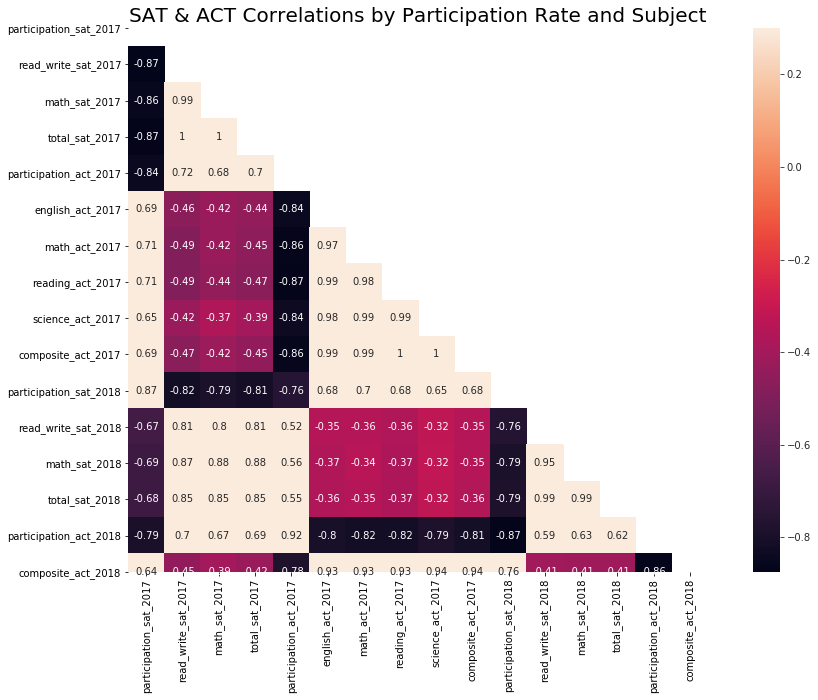

In [100]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,10))


# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

plt.title('SAT & ACT Correlations by Participation Rate and Subject', fontsize = 20)

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(final.corr(),mask=mask, vmax=.3, square=True, annot=True)

This heatmap allows us to see which features are correlated with each other and which are not. Scores and participation rates tend to be correlated for the two exams year over year.

In [127]:
#Creating function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Making sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        

#### Plotting Histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [116]:
#Creating lists for participation histogram function inputs
participation_columns = ['participation_sat_2017','participation_sat_2018', 'participation_act_2017', 'participation_act_2018']
participation_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
participation_xlabels = ['% Participation', '% Participation', '% Participation','% Participation']
                         
                         

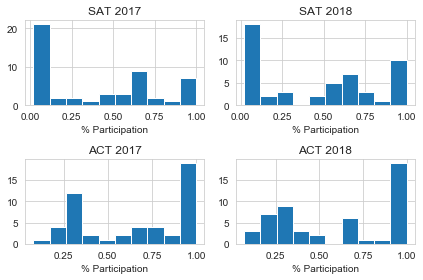

In [128]:
#Plots histogram of participation rateas for SAT and ACT for 2017 and 2018
subplot_histograms(final,participation_columns, participation_titles, participation_xlabels)

plt.tight_layout();           

 - SAT has many states with a partipation rate of less than 25% while the ACT has many states with a 100% participation rate.

In [120]:
#Creating lists for Math histogram function inputs
math_columns = ['math_sat_2017','math_sat_2018', 'math_act_2017']
math_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017']
math_xlabels = ['Math Score', 'Math Score', 'Math Score']




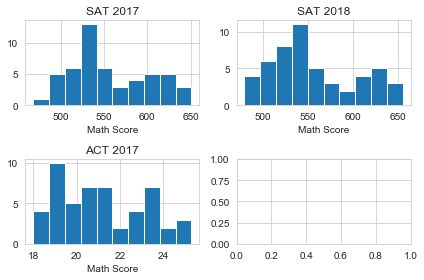

In [121]:
#Plots histogram of Math scores for SAT and ACT for 2017 and 2018
subplot_histograms(final,math_columns, math_titles, math_xlabels)

plt.tight_layout();

SAT math score distributions are slightly skewed to the right with a mode around 550.

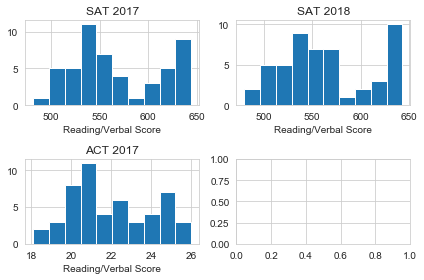

In [129]:
#Creating lists for Reading/Verbal histogram function inputs
read_verbal_columns = ['read_write_sat_2017','read_write_sat_2018', 'reading_act_2017']
read_verbal_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017']
read_verbal_xlabels = ['Reading/Verbal Score', 'Reading/Verbal Score', 'Reading/Verbal Score','Reading/Verbal Score']

subplot_histograms(final,read_verbal_columns, read_verbal_titles, read_verbal_xlabels)

plt.tight_layout();
                         

Some states perform very well in the Reading/Verbal sections on the SAT.

#### Scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018


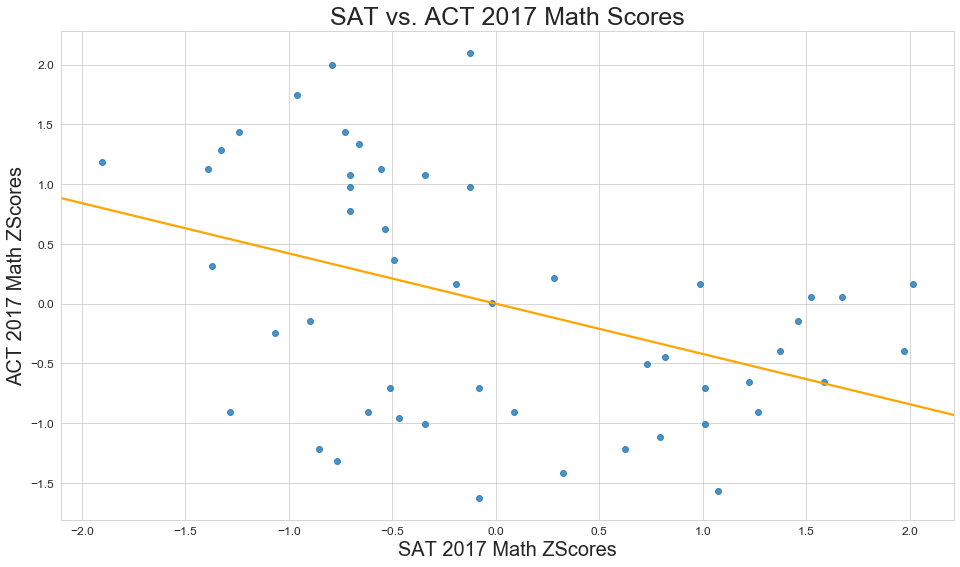

In [133]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(stats.zscore(final['math_sat_2017']),
            stats.zscore(final['math_act_2017']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT vs. ACT 2017 Math Scores", fontsize = 25)
plt.ylabel("ACT 2017 Math ZScores", fontsize = 20)
plt.xlabel("SAT 2017 Math ZScores", fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

 - SAT and ACT math scores are negatively correlated.

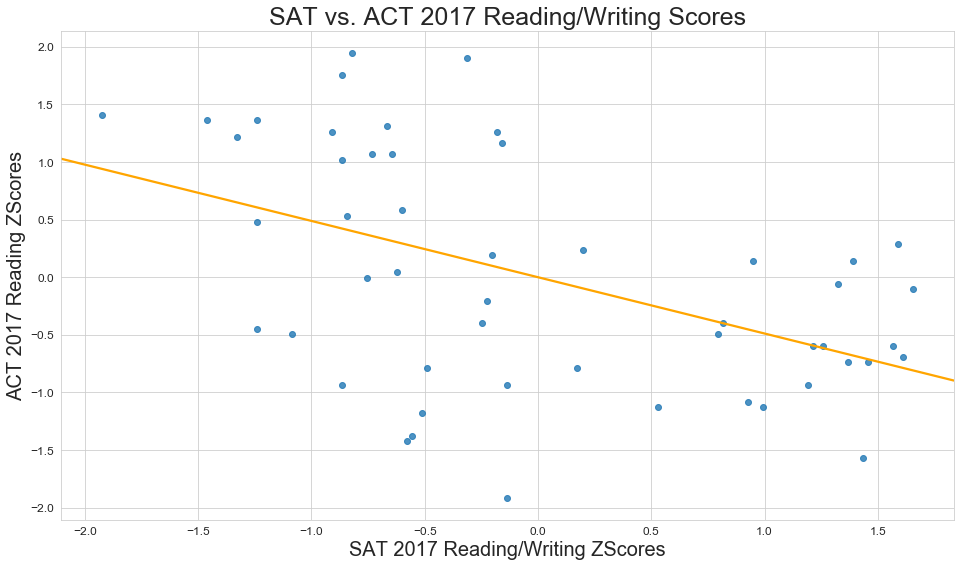

In [134]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(stats.zscore(final['read_write_sat_2017']),
            stats.zscore(final['reading_act_2017']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT vs. ACT 2017 Reading/Writing Scores", fontsize = 25)
plt.ylabel("ACT 2017 Reading ZScores", fontsize = 20)
plt.xlabel("SAT 2017 Reading/Writing ZScores", fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

 - SAT reading/writing scores are negatively correlated with ACT reading scores.

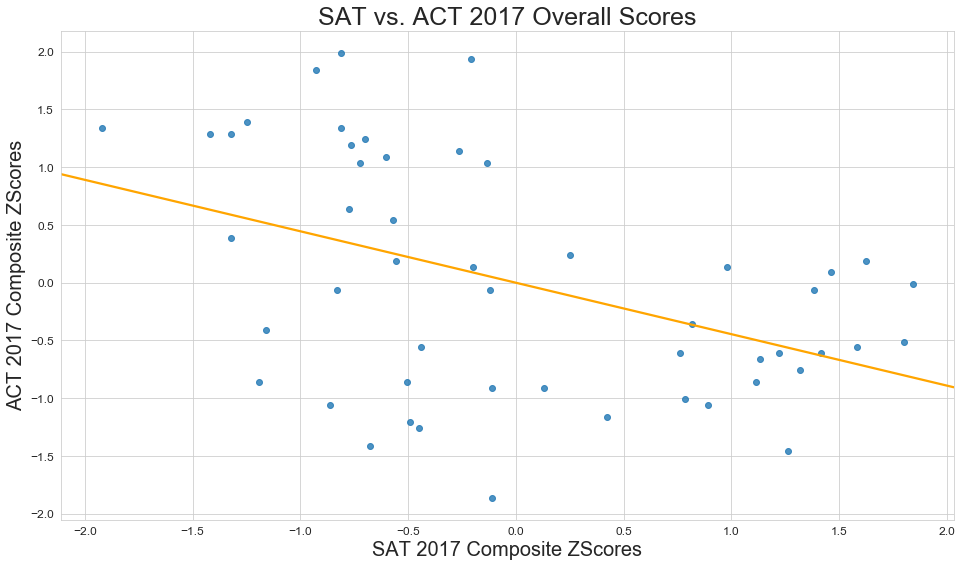

In [136]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(stats.zscore(final['total_sat_2017']),
            stats.zscore(final['composite_act_2017']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT vs. ACT 2017 Overall Scores", fontsize = 25)
plt.ylabel("ACT 2017 Composite ZScores", fontsize = 20)
plt.xlabel("SAT 2017 Composite ZScores", fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

 - ACT and SAT composite scores are negatively correlated.  

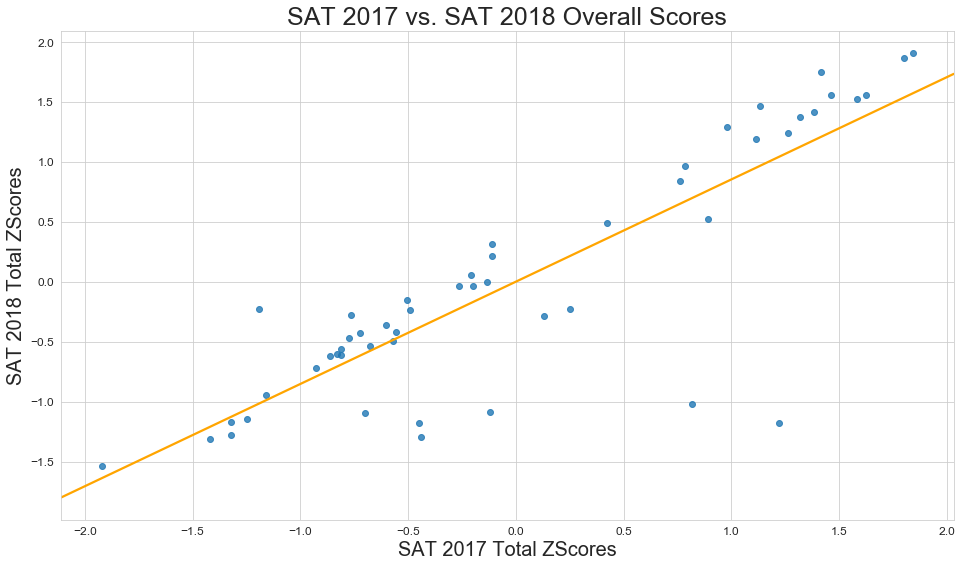

In [137]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(stats.zscore(final['total_sat_2017']),
            stats.zscore(final['total_sat_2018']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT 2017 vs. SAT 2018 Overall Scores", fontsize = 25)
plt.ylabel("SAT 2018 Total ZScores", fontsize = 20)
plt.xlabel("SAT 2017 Total ZScores", fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

 - SAT scores from 2017 and 2018 are positively correlated. Weren't big differences between the average scores when comparing both years.

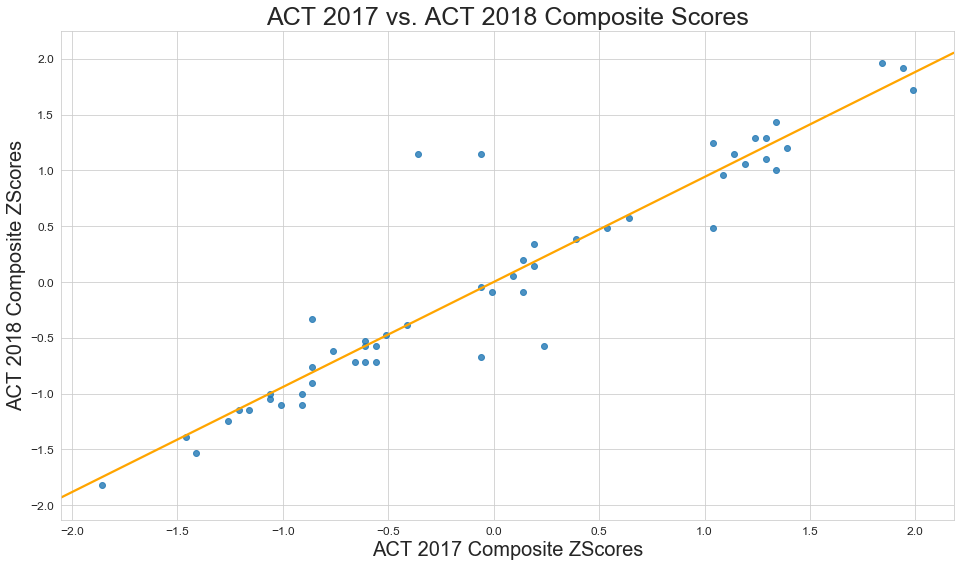

In [138]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(stats.zscore(final['composite_act_2017']),
            stats.zscore(final['composite_act_2018']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("ACT 2017 vs. ACT 2018 Composite Scores", fontsize = 25)
plt.ylabel("ACT 2018 Composite ZScores", fontsize = 20)
plt.xlabel("ACT 2017 Composite ZScores", fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

 - Similar to the SAT, ACT scores in 2017 and 2018 were positively correlated.

#### Boxplots
For numeric variables

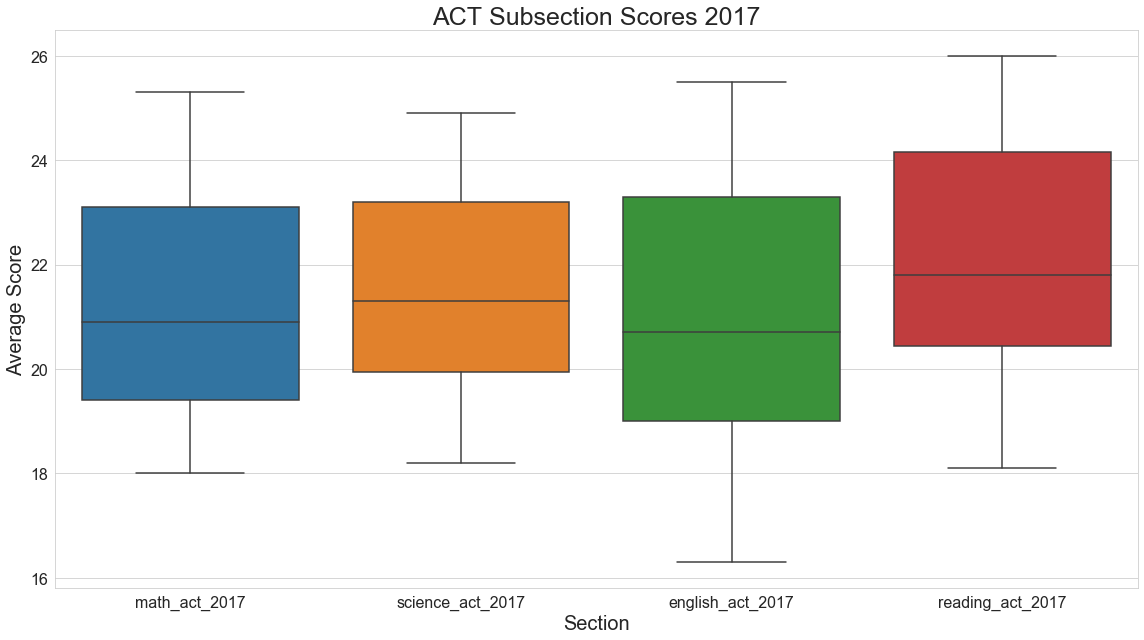

In [142]:
#2017 ACT scores by section
plt.figure(figsize = (16, 9))

plt.title("ACT Subsection Scores 2017", size = 25)
sns.boxplot(data = final[["math_act_2017", "science_act_2017", "english_act_2017", "reading_act_2017"]])

plt.ylabel("Average Score", size = 20)
plt.xlabel('Section', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)
plt.tight_layout();


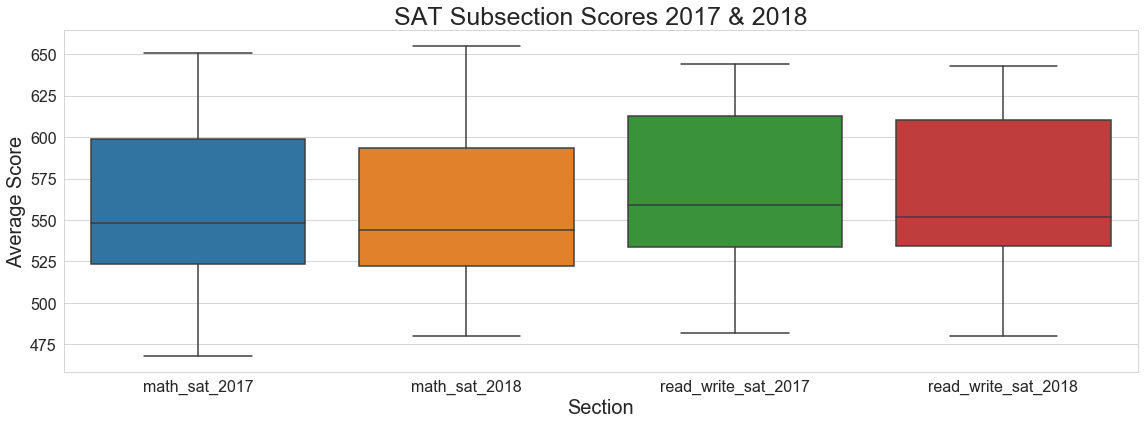

In [144]:
#SAT subsection scores
plt.figure(figsize = (16, 6))

plt.title("SAT Subsection Scores 2017 & 2018", size = 25)
sns.boxplot(data = final[["math_sat_2017", 'math_sat_2018', "read_write_sat_2017", 'read_write_sat_2018']])

plt.ylabel("Average Score", size = 20)
plt.xlabel('Section', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.tight_layout();

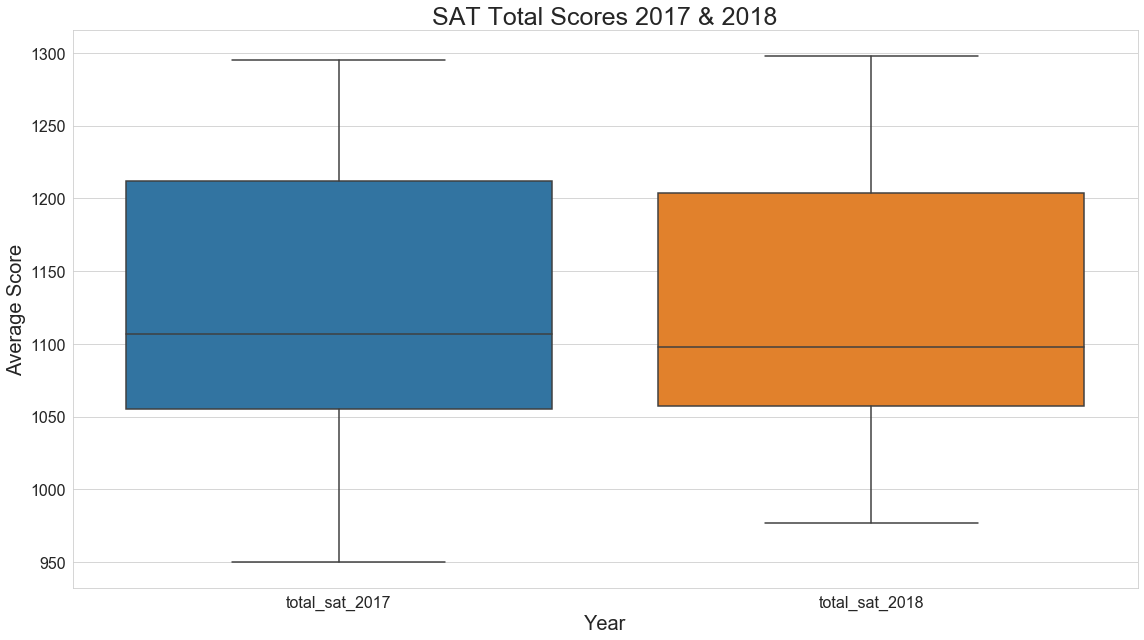

In [145]:
#SAT total scores
plt.figure(figsize = (16, 9))

plt.title("SAT Total Scores 2017 & 2018", size = 25)
sns.boxplot(data = final[["total_sat_2017", 'total_sat_2018']])

plt.ylabel("Average Score", size = 20)
plt.xlabel('Year', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.tight_layout();

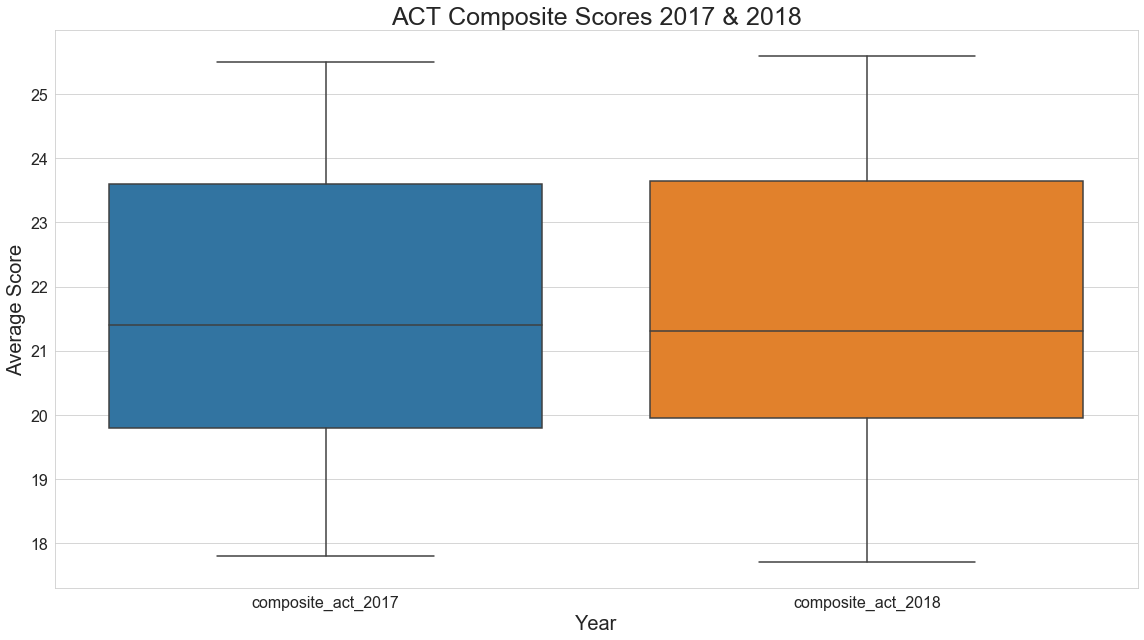

In [146]:
#ACT Composite Scores
plt.figure(figsize = (16, 9))

plt.title("ACT Composite Scores 2017 & 2018", size = 25)
sns.boxplot(data = final[["composite_act_2017", 'composite_act_2018']])

plt.ylabel("Average Score", size = 20)
plt.xlabel('Year', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.tight_layout();

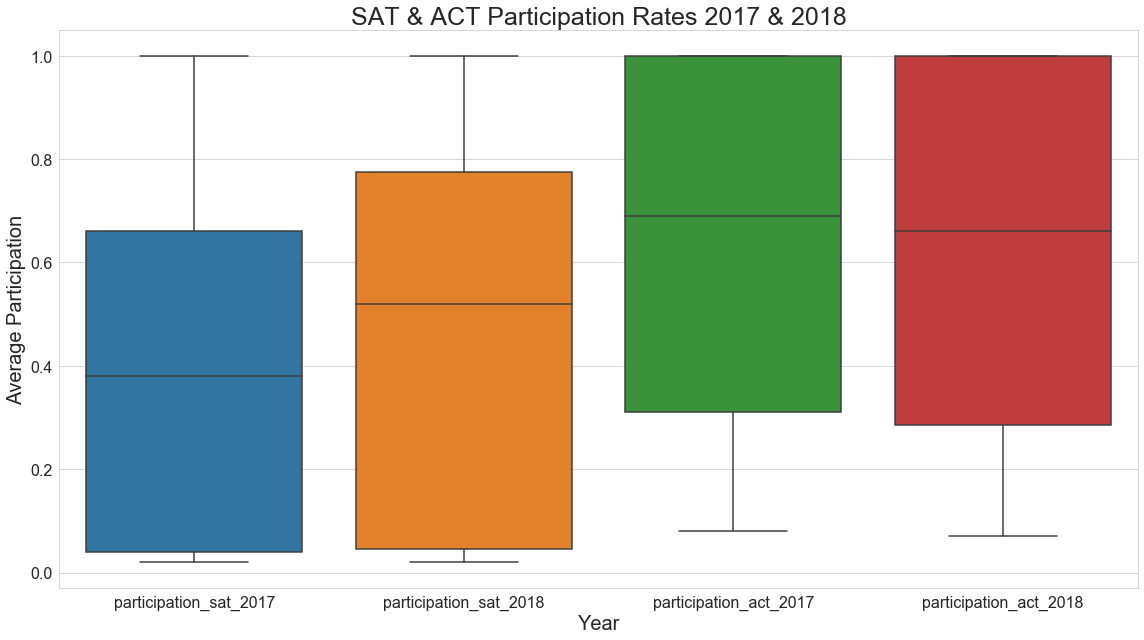

In [147]:
#SAT & ACT Participation Rates
plt.figure(figsize = (16, 9))

plt.title("SAT & ACT Participation Rates 2017 & 2018", size = 25)
sns.boxplot(data = final[["participation_sat_2017", "participation_sat_2018", "participation_act_2017", 'participation_act_2018']])

plt.ylabel("Average Participation", size = 20)
plt.xlabel('Year', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.tight_layout();

#### Plots by Region

In [148]:
#Creating a new dataframe
final_geo = final

In [150]:
#Bringing in new csv file with regional data. Provided by Andrew Artz
geog = pd.read_csv("../data/us_census_region - Sheet1.csv")

In [151]:
geog.head()

,region,division,Unnamed: 2,state
0,Northeast_Region,New_England_Division,NaN,Connecticut
1,Northeast_Region,New_England_Division,NaN,Maine
2,Northeast_Region,New_England_Division,NaN,Massachusetts
3,Northeast_Region,New_England_Division,NaN,New Hampshire
4,Northeast_Region,New_England_Division,NaN,Rhode Island


In [152]:
#Creating new columns to match new csv
final_geo.insert(1, 'division', 'value', allow_duplicates=False)

In [153]:
final_geo.insert(1, 'region', 'value', allow_duplicates=False)

In [154]:
final_geo.update(geog, join='left', overwrite=True, filter_func=None, errors='ignore')

In [155]:
final_geo.tail()

,state,region,division,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,read_write_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
46,Alaska,West_Region,Pacific_Division,0.65,561,541,1102,0.29,23.5,23.3,24.6,23.5,23.8,0.68,567.0,550.0,1117.0,0.24,23.9
47,California,West_Region,Pacific_Division,0.64,541,534,1075,0.29,20.9,21.9,22.1,22.0,21.9,0.69,543.0,538.0,1081.0,0.24,22.2
48,Hawaii,West_Region,Pacific_Division,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4,0.28,513.0,486.0,999.0,0.65,20.3
49,Oregon,West_Region,Pacific_Division,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641.0,653.0,1294.0,1.00,20.5
50,Washington,West_Region,Pacific_Division,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2,0.03,633.0,625.0,1257.0,1.00,20.0


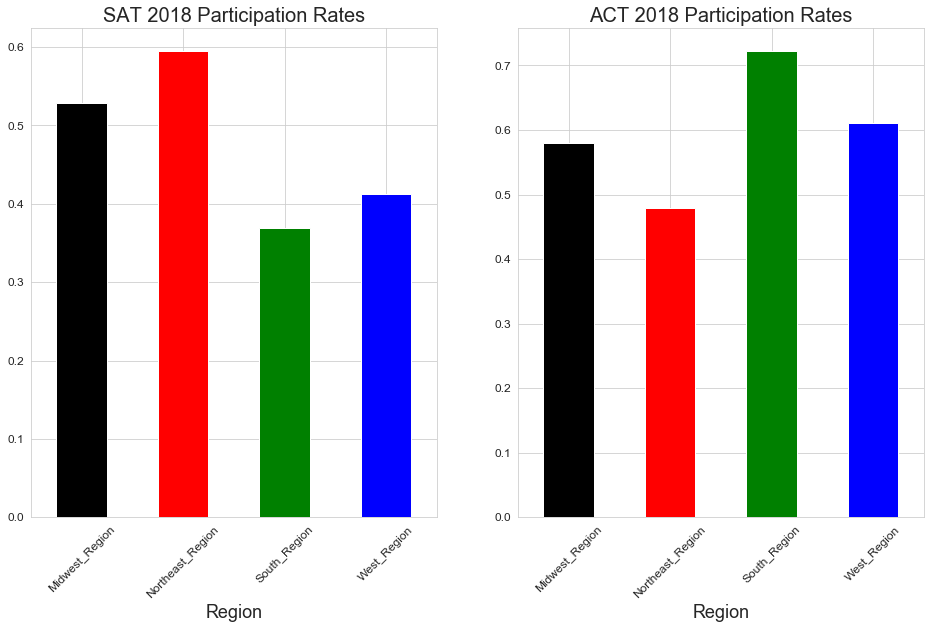

In [159]:
#plot to show differences in participation rate by region for the SAT and ACT in 2018.
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
final_geo.groupby('region')['participation_sat_2018'].mean().plot.bar(color=['black', 'red', 'green', 'blue'])
plt.xlabel('Region', fontsize = 18)
plt.xticks(rotation=45)
plt.title('SAT 2018 Participation Rates', fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(1, 2, 2)
final_geo.groupby('region')['participation_act_2018'].mean().plot.bar(color=['black', 'red', 'green', 'blue'])
plt.xlabel('Region', fontsize = 18)
plt.xticks(rotation=45)
plt.title('ACT 2018 Participation Rates', fontsize = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

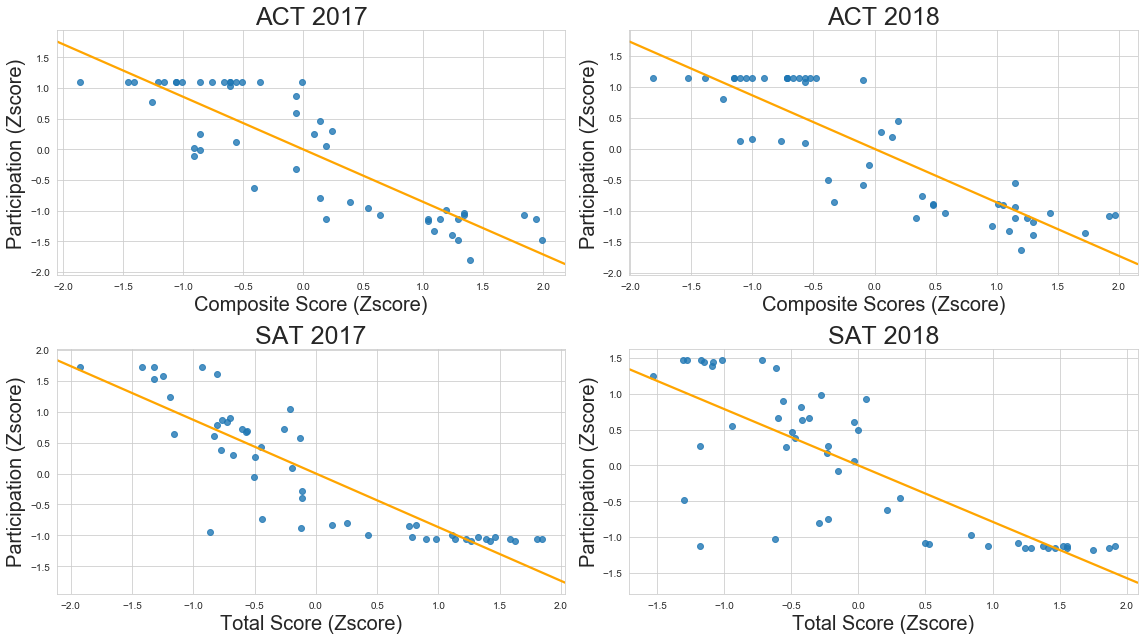

In [160]:
#ACT Scores vs. ACT Participation
#Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)

# Create scatter plot of ACT Score vs 
sns.regplot(stats.zscore(final_geo['composite_act_2017']),
            stats.zscore(final['participation_act_2017']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("ACT 2017", fontsize = 25)
plt.ylabel("Participation (Zscore)", fontsize = 20)
plt.xlabel("Composite Score (Zscore)", fontsize = 20)

plt.subplot(2, 2, 2)
sns.regplot(stats.zscore(final_geo['composite_act_2018']),
            stats.zscore(final['participation_act_2018']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("ACT 2018", fontsize = 25)
plt.ylabel("Participation (Zscore)", fontsize = 20)
plt.xlabel("Composite Scores (Zscore)", fontsize = 20)

plt.subplot(2, 2, 3)

# Create scatter plot of SAT Score vs Participation
sns.regplot(stats.zscore(final_geo['total_sat_2017']),
            stats.zscore(final['participation_sat_2017']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT 2017", fontsize = 25)
plt.ylabel("Participation (Zscore)", fontsize = 20)
plt.xlabel("Total Score (Zscore)", fontsize = 20)


plt.subplot(2, 2, 4)

# Create scatter plot of SAT Score vs Participation
sns.regplot(stats.zscore(final_geo['total_sat_2018']),
            stats.zscore(final['participation_sat_2018']), 
            ci = None, 
            line_kws = {'color': 'orange'})

plt.title("SAT 2018", fontsize = 25)
plt.ylabel("Participation (Zscore)", fontsize = 20)
plt.xlabel("Total Score (Zscore)", fontsize = 20)


plt.tight_layout();


## Descriptive and Inferential Statistics

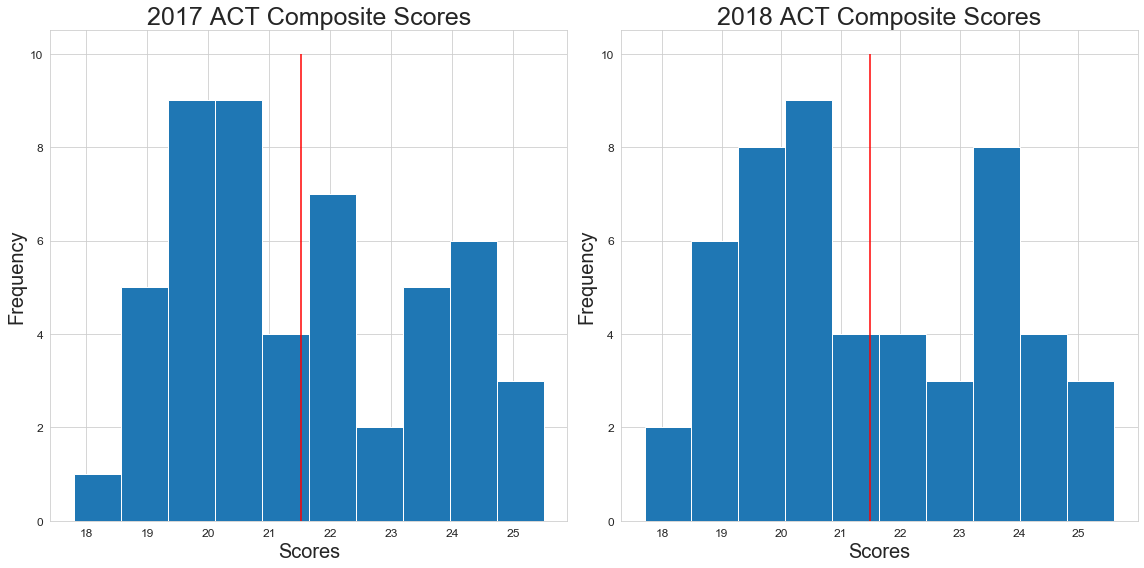

In [164]:
#Histogram of Composite ACT scores in 207 and 2018
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
final['composite_act_2017'].hist()
plt.title('2017 ACT Composite Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['composite_act_2017']), ymin = 0, ymax = 10, color = 'r');
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(1, 2, 2)
final['composite_act_2018'].hist()
plt.title('2018 ACT Composite Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['composite_act_2018']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout();



 - From the histograms above, you can see that the ACT composite scores for the ACT in 2017 & 2018 are not normally distributed and are skewed to the right.

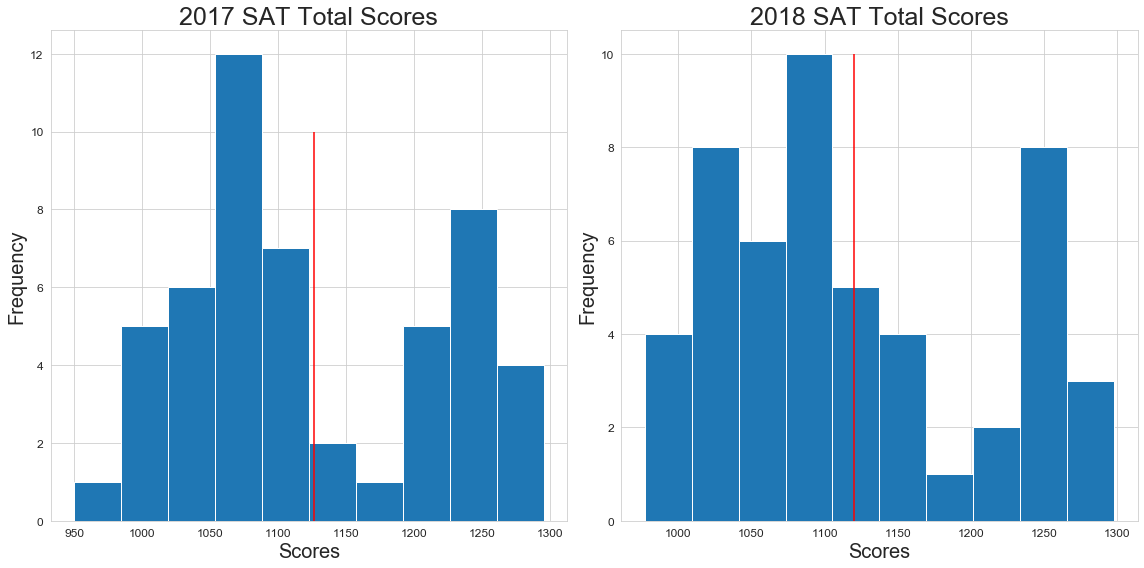

In [165]:
#Histogram of Total SAT scores in 2017 and 2018
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
final['total_sat_2017'].hist()
plt.title('2017 SAT Total Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['total_sat_2017']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(1, 2, 2)
final['total_sat_2018'].hist()
plt.title('2018 SAT Total Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['total_sat_2018']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout();


 - Similar to the ACT, from the histograms above, you can see that the SAT total scores in 2017 & 2018 are not normally distributed and are skewed to the right.

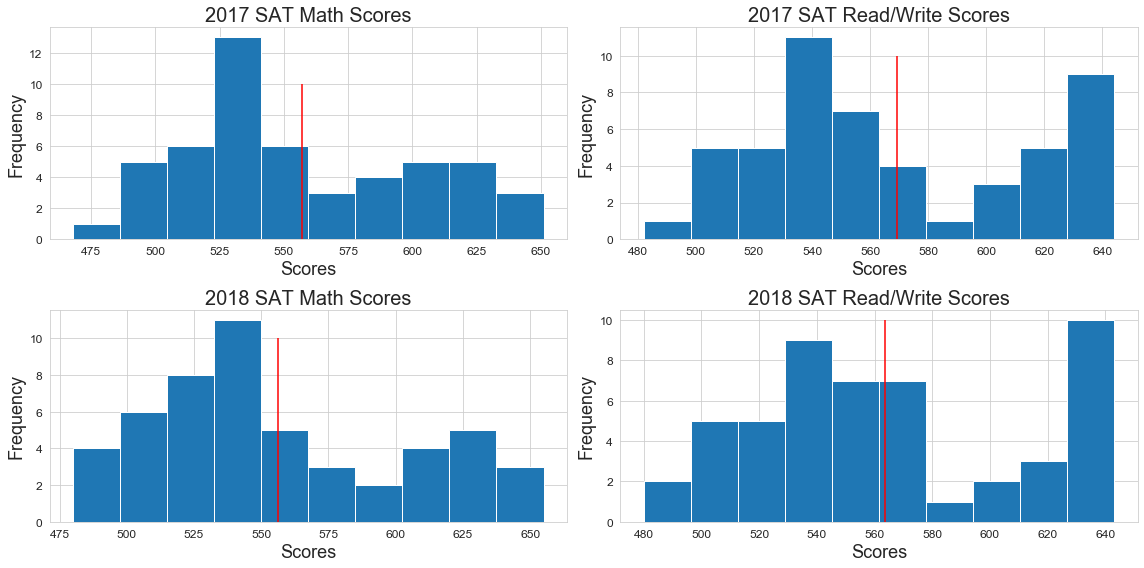

In [167]:
#Histogram of SAT Section scores in 2017 and 2018
plt.figure(figsize=(16, 8))


plt.subplot(2, 2, 1)
final['math_sat_2017'].hist()
plt.title('2017 SAT Math Scores', size = 20)
plt.xlabel('Scores', size = 18)
plt.ylabel('Frequency', size = 18)
plt.vlines(x = np.mean(final['math_sat_2017']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 2)
final['read_write_sat_2017'].hist()
plt.title('2017 SAT Read/Write Scores', size = 20)
plt.xlabel('Scores', size = 18)
plt.ylabel('Frequency', size = 18)
plt.vlines(x = np.mean(final['read_write_sat_2017']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 3)
final['math_sat_2018'].hist()
plt.title('2018 SAT Math Scores', size = 20)
plt.xlabel('Scores', size = 18)
plt.ylabel('Frequency', size = 18)
plt.vlines(x = np.mean(final['math_sat_2018']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 4)
final['read_write_sat_2018'].hist()
plt.title('2018 SAT Read/Write Scores', size = 20)
plt.xlabel('Scores', size = 18)
plt.ylabel('Frequency', size = 18)
plt.vlines(x = np.mean(final['read_write_sat_2018']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)




plt.tight_layout();


 - All of the SAT sections are skewed to the right and are not normally distributed.

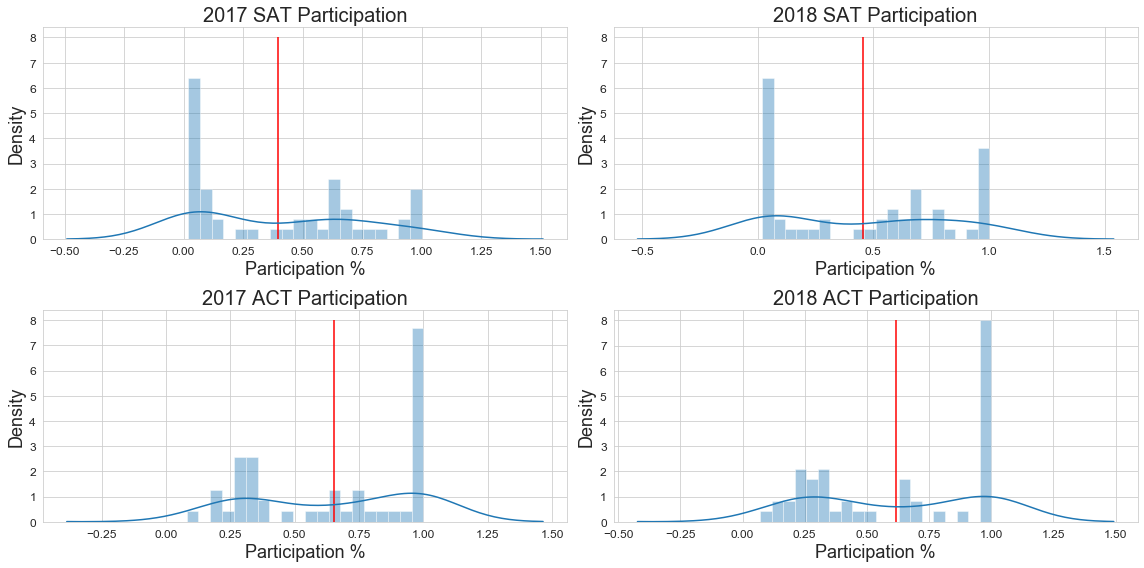

In [169]:
#Distribution plot of participation % for SAT and ACT in 2017 and 2018.

plt.figure(figsize=(16, 8))


plt.subplot(2, 2, 1)
sns.distplot(final['participation_sat_2017'], bins = 20)
plt.title('2017 SAT Participation', size = 20)
plt.xlabel('Participation %', size = 18)
plt.ylabel('Density', size = 18)
plt.vlines(x = np.mean(final['participation_sat_2017']), ymin = 0, ymax = 8, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 2)
sns.distplot(final['participation_sat_2018'], bins = 20)
plt.title('2018 SAT Participation', size = 20)
plt.xlabel('Participation %', size = 18)
plt.ylabel('Density', size = 18)
plt.vlines(x = np.mean(final['participation_sat_2018']), ymin = 0, ymax = 8, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 3)
sns.distplot(final['participation_act_2017'], bins = 20)
plt.title('2017 ACT Participation', size = 20)
plt.xlabel('Participation %', size = 18)
plt.ylabel('Density', size = 18)
plt.vlines(x = np.mean(final['participation_act_2017']), ymin = 0, ymax = 8, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(2, 2, 4)
sns.distplot(final['participation_act_2018'], bins = 20)
plt.title('2018 ACT Participation',size = 20)
plt.xlabel('Participation %', size = 18)
plt.ylabel('Density', size = 18)
plt.vlines(x = np.mean(final['participation_act_2018']), ymin = 0, ymax = 8, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout();


 - Neither of the participation rates for the SAT and ACT in 2017 and 2018 were normally distributed. SAT participation is skewed to the right and ACT is skewed to the left.

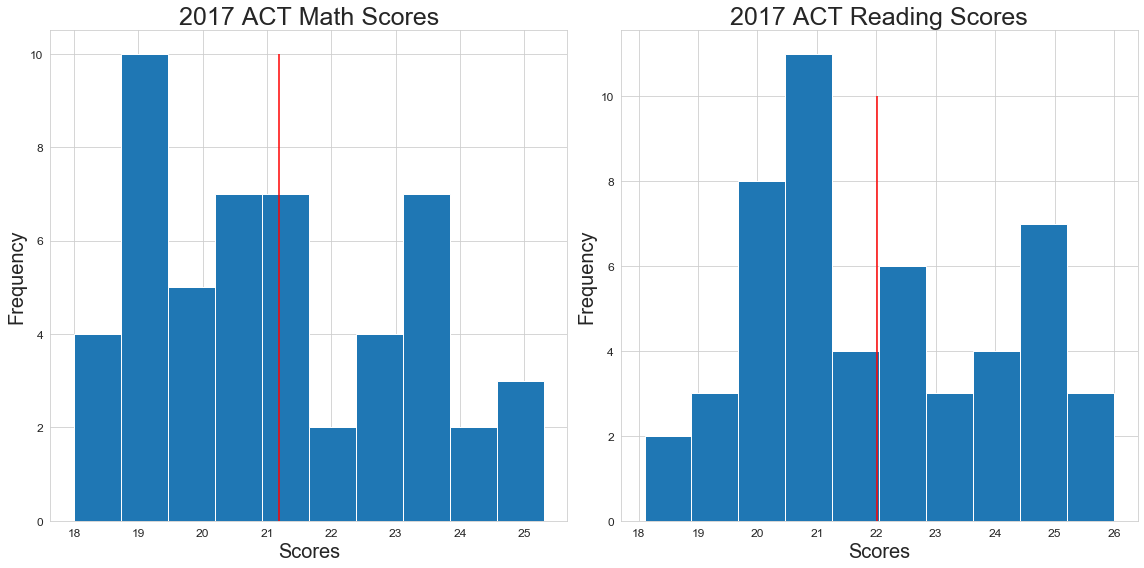

In [172]:
#Histogram of ACT Math and Reading scores in 2017 
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
final['math_act_2017'].hist()
plt.title('2017 ACT Math Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['math_act_2017']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(1, 2, 2)
final['reading_act_2017'].hist()
plt.title('2017 ACT Reading Scores', size = 25)
plt.xlabel('Scores', size = 20)
plt.ylabel('Frequency', size = 20)
plt.vlines(x = np.mean(final['reading_act_2017']), ymin = 0, ymax = 10, color = 'r')
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout();

 - Both math and reading scores for the ACT in 2017 were skewed to the right and did not have a normal distribution.

## Outside Research

Three states that demonstrates interesting trends were Colorado, Illinois and Maine. These states now cover the cost of the SAT for their students. As expected this caused the particpation rate in Colorado and Maine to increase for the SAT from 2017 in 2018. Specifically in Colorado, participation on the SAT jumped from 11% to 100%. ACT participation fell from 100% to 30%. Clearly, Colorado covering the cost increased the participation. Illinois was odd because participation actually decreased slightly for SAT despite the state now covering the cost. 

In [173]:
final[final['state'] == 'Illinois']

,state,region,division,participation_sat_2017,read_write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,read_write_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
9,Illinois,Midwest_Region,East_North_Central_Division,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550.0,549.0,1099.0,0.66,19.9


## Conclusions and Recommendations

After reviewing and analyzing all of the data, I came to the conclusion that the college board should focus their marketing on states with low SAT participation that have the ACT as mandatory. Many of the states that have low SAT particiaption rates have a 100% participation rate on the ACT since it is mandatory. This is causing the negative correlation between participation rates for the two exams. Many students who have no interest in going to college will only take the one exam, while the most college-driven students will take both. 

One way to market the SAT to students to increase the participation rates would be to explain that the two exams are not the same. In my findings, I saw that SAT and ACT scores are negatively correlated. Meaning doing well on one exam, doesn't necessarily mean you will do well on the other and vice versa. Students may not realize that the tests are different and the SAT doesn't even test science knowledge. This is an important message to bring across because many students may be able to increase their chances of going to college by taking the SAT if they performed poorly on the ACT. The south is a region in particular that the college board can focus on due to the large disparity in participation rates.

An area of concern in my research is that overall test scores are negatively correlated with participation rates. If states are concerned with keeping their average test scores up, then increasing participation will not hel their cause.

Knowing the percent of students that took both exams would have been extremely useful in my research. It would allow me to look for trends in states where neither exam is mandatory.
